In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-r2fh64t4/kobert-tokenizer_b1c51ca5217b44aaa836f7beacf91232
  Running command git clone -q https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-r2fh64t4/kobert-tokenizer_b1c51ca5217b44aaa836f7beacf91232


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
from kobert_tokenizer import KoBERTTokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1', sp_model_kwargs={'nbest_size': -1, 'alpha': 0.6, 'enable_sampling': True})

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
#허깅페이스
from transformers import BertModel
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

In [ ]:
tokenizer.encode("코로나 19는 멈춰야 한다")

[2, 4665, 6079, 5655, 548, 5760, 517, 6187, 7473, 6844, 4965, 3]

In [ ]:
#gpu use
device = torch.device('cuda:0')

In [ ]:
torch.__version__

'1.12.0+cu113'

In [ ]:
torch.cuda.is_available()

True

In [ ]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/이용상교수님분석/220809_data_v1.0.csv', encoding='utf-8')

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data['essay'], data['grammar'],
                                                                      stratify = data['grammar'],
                                                                     test_size = 0.2,
                                                                       random_state = 1234)

In [ ]:
train_data_grammar = pd.concat([train_input, train_target], axis = 1)

test_data_grammar = pd.concat([test_input, test_target], axis = 1)

In [ ]:
tokenizer.encode(train_data_grammar['essay'][0])

[2,
 554,
 116,
 5712,
 539,
 7028,
 6896,
 517,
 7533,
 6079,
 5655,
 116,
 5330,
 2235,
 6361,
 7812,
 554,
 127,
 5712,
 7086,
 1585,
 7217,
 7095,
 4998,
 5330,
 517,
 5896,
 54,
 972,
 6983,
 2633,
 5330,
 1907,
 6441,
 5893,
 1955,
 2586,
 5101,
 7088,
 934,
 5400,
 1763,
 6885,
 5782,
 54,
 1585,
 6928,
 7533,
 1185,
 517,
 7295,
 760,
 993,
 6441,
 6004,
 517,
 7836,
 2872,
 3860,
 910,
 3759,
 5475,
 7095,
 1585,
 7217,
 7126,
 913,
 54,
 3759,
 7086,
 2636,
 1746,
 6081,
 1359,
 7096,
 1105,
 6116,
 517,
 7848,
 6844,
 7820,
 2636,
 5142,
 3424,
 4945,
 2089,
 2584,
 5937,
 4665,
 6079,
 5655,
 6438,
 6095,
 5330,
 4446,
 6964,
 5561,
 5859,
 4965,
 54,
 3671,
 712,
 5475,
 5788,
 7217,
 498,
 7095,
 3553,
 2859,
 5064,
 4213,
 6855,
 7344,
 5137,
 6903,
 3504,
 517,
 6228,
 6884,
 7088,
 4977,
 2872,
 3881,
 54,
 5051,
 6514,
 6903,
 768,
 3860,
 3918,
 7088,
 3942,
 5146,
 7815,
 1218,
 7836,
 2872,
 3860,
 2270,
 7088,
 4446,
 6844,
 7828,
 5782,
 54,
 1674,
 7203,
 2932,


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, vocab=vocab, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 512
batch_size = 1
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
train_data_grammar_list = []

for q, label in zip(train_data_grammar['essay'], train_data_grammar['grammar']):
  data = []
  data.append(q)
  data.append(str(label))

  train_data_grammar_list.append(data)


test_data_grammar_list = []

for q, label in zip(test_data_grammar['essay'], test_data_grammar['grammar']):
  data_test = []
  data_test.append(q)
  data_test.append(str(label))

  test_data_grammar_list.append(data_test)

In [ ]:
print(train_data_grammar_list[1])
print(test_data_grammar_list[0])

['요즘 우리는 코로나로 인해 ‘사회적 거리두기’가 장기화된 사회에 살고 있다. 마음 편히 놀러다닐 수도 없고 최대한 외출을 자제하며 누군가의 작은 기침에도 다수가 예민하게 반응한다. 또 많은 사람들이 일자리로 인해 어려움을 겪고 있기도 하다. 이 때문에 ‘코로나블루’라는 신조어까지 생겨났는데, ‘코로나블루’는 코로나로 일상생활에 지장이 생기면서 느끼는 우울감이나 무기력증 등 심리적 이상 증세를 일컫는 말이다. 신조어가 생겨날 만큼 현재 많은 사람들이 친구, 애인, 가족과 원활하게 소통하지 못하고 관계가 단절된 채 살아가고 있다는 뜻이다.## 그렇다면 코로나로 인해 촉발된 ‘관계단절’의 위기를 극복할 수 있는 방안은 무엇일까? 내가 생각한 방안은 이러하다. 가장 중요한 첫 번째는 가족, 친구 등 주변 사람들과 온라인으로 자주 소통하기이다. ‘사회적 거리두기’가 계속되면서 얼굴을 오랫동안 보지 못한 지인들이 늘어가고 있다. 밖에서 만나는게 어려운 지금일수록 온라인을 이용하여 안부를 주고받고 이른바 수다를 떨며 소통하는 것이 중요하다고 생각한다.## 두 번째는 집 주변이라도 가볍게 산책하거나 잠시라도 햇빛에 노출하기이다. 코로나에 걸릴지 모른다는 불안감 때문에 현재 다수가 야외활동을 제한하고 있다. 특히 어린아이가 있는 집안이라면 더더욱 그렇다. 하지만 야외활동 부족으로 집에만 있으면서 우울감도 늘어가고 건강에도 문제가 생길 수 있다. 따라서 너무 과도한 외출은 자제해야 하는 것이 맞지만 생활방역 수칙을 준수하며 가벼운 산책 정도는 필요하다고 생각한다.## 세 번째는 집에서도 가능한 나만의 취미 만들기이다. 현재 다수가 코로나로 인해 강제 ‘집콕’ 생활을 하고 있다. 밖을 돌아다니는 것을 좋아하는 사람들도 강제로 ‘집순이’, ‘집돌이’가 되고 있고 재택근무로 인해 집에 있게 된 직장인들도 늘어나고 있다. 하루종일 집에 있는 시간이 늘어난 만큼 무의미하게 시간을 보내는 것이 아니라 이 시기를 자기개발의 기회로 삼는 것이 좋다고 생각한다. 바쁠 때는 하지 못했던 음악

In [ ]:
tok = tokenizer.tokenize

data_train = BERTDataset(train_data_grammar_list, 0, 1, tok, vocab, max_len, True, False)
data_test = BERTDataset(test_data_grammar_list, 0, 1, tok, vocab, max_len, True, False)

In [ ]:
train_grammar_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_grammar_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel,  dr_rate=0.1).to(device)

In [ ]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_grammar_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(train_grammar_dataloader), total=len(train_grammar_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(test_grammar_dataloader), total=len(test_grammar_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 2.1557259559631348 train acc 0.0
epoch 1 batch id 201 loss 1.060650110244751 train acc 0.2885572139303483
epoch 1 train acc 0.295


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 1 test acc 0.31


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.181382417678833 train acc 0.0
epoch 2 batch id 201 loss 1.191718578338623 train acc 0.30845771144278605
epoch 2 train acc 0.3175


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 2 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.9364393353462219 train acc 1.0
epoch 3 batch id 201 loss 1.3088356256484985 train acc 0.32338308457711445
epoch 3 train acc 0.3175


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 3 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.8378126621246338 train acc 1.0
epoch 4 batch id 201 loss 1.0823854207992554 train acc 0.3383084577114428
epoch 4 train acc 0.33


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 4 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 1.0022506713867188 train acc 1.0
epoch 5 batch id 201 loss 0.9384196400642395 train acc 0.3582089552238806
epoch 5 train acc 0.3425


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 5 test acc 0.34


In [ ]:
result = []

model.eval()

with torch.no_grad():
  for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(test_grammar_dataloader), total=len(test_grammar_dataloader)):
      token_ids = token_ids.long().to(device)
      segment_ids = segment_ids.long().to(device)
      valid_length= valid_length
      result.append(model(token_ids, valid_length, segment_ids))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
result_grammar = []
for i in result:
  for j in i:
    result_grammar.append(int(torch.argmax(j)))

In [ ]:
# result_grammar

In [ ]:
cm_test_target = list(test_target)

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix as cfm

In [ ]:
cm = cfm(cm_test_target, result_grammar)

In [ ]:
cm

array([[ 0,  0,  2,  0,  0],
       [ 0,  0, 17,  0,  0],
       [ 0,  0, 34,  0,  0],
       [ 0,  0, 31,  0,  0],
       [ 0,  0, 16,  0,  0]])

In [ ]:
from sklearn.metrics import classification_report as cr

print(cr(cm_test_target, result_grammar))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        17
           2       0.34      1.00      0.51        34
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        16

    accuracy                           0.34       100
   macro avg       0.07      0.20      0.10       100
weighted avg       0.12      0.34      0.17       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


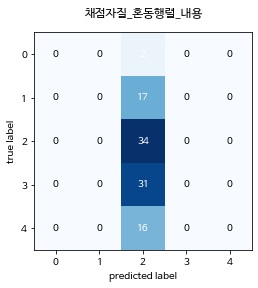

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')
flgure, ax = plot_confusion_matrix(conf_mat =cm,
                             cmap = plt.cm.Blues)
ax.set_title('채점자질_혼동행렬_내용')
plt.savefig('채점자질_혼동행렬_내용.jpg')


In [ ]:
#grammar

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/이용상교수님분석/latest_data_0809.csv', encoding='utf-8')

In [ ]:
print(np.unique(data['content'], return_counts = True))
print(np.unique(data['grammar'], return_counts = True))

(array([0, 1, 2, 3, 4]), array([  8,  85, 171, 158,  78]))
(array([0, 1, 2, 3, 4]), array([  9, 116, 169, 155,  51]))


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/이용상교수님분석/latest_data_0809.csv', encoding='utf-8')

import sklearn
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data['essay'], data['grammar'],
                                                                      stratify = data['grammar'],
                                                                     test_size = 0.2,
                                                                       random_state = 1234)

train_data_grammar = pd.concat([train_input, train_target], axis = 1)

test_data_grammar = pd.concat([test_input, test_target], axis = 1)


class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, vocab=vocab, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))




# Setting parameters
max_len = 512
batch_size = 1
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5



train_data_grammar_list = []

for q, label in zip(train_data_grammar['essay'], train_data_grammar['grammar']):
  data = []
  data.append(q)
  data.append(str(label))

  train_data_grammar_list.append(data)


test_data_grammar_list = []

for q, label in zip(test_data_grammar['essay'], test_data_grammar['grammar']):
  data_test = []
  data_test.append(q)
  data_test.append(str(label))

  test_data_grammar_list.append(data_test)



tok = tokenizer.tokenize

data_train = BERTDataset(train_data_grammar_list, 0, 1, tok, vocab, max_len, True, False)
data_test = BERTDataset(test_data_grammar_list, 0, 1, tok, vocab, max_len, True, False)



train_grammar_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_grammar_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)



class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)


model = BERTClassifier(bertmodel,  dr_rate=0.1).to(device)



# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]



optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_grammar_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)


def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc


for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(train_grammar_dataloader), total=len(train_grammar_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(test_grammar_dataloader), total=len(test_grammar_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.648139476776123 train acc 0.0
epoch 1 batch id 201 loss 1.9431780576705933 train acc 0.24875621890547264
epoch 1 train acc 0.2725


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 1 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.1229926347732544 train acc 0.0
epoch 2 batch id 201 loss 1.8417117595672607 train acc 0.30845771144278605
epoch 2 train acc 0.315


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 2 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 1.0093588829040527 train acc 1.0
epoch 3 batch id 201 loss 1.8072190284729004 train acc 0.32338308457711445
epoch 3 train acc 0.325


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 3 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.9016952514648438 train acc 1.0
epoch 4 batch id 201 loss 1.6953606605529785 train acc 0.3781094527363184
epoch 4 train acc 0.3525


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 4 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 1.0060964822769165 train acc 1.0
epoch 5 batch id 201 loss 1.5837831497192383 train acc 0.3333333333333333
epoch 5 train acc 0.335


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 5 test acc 0.34


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  0%|          | 0/100 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        23
           2       0.34      1.00      0.51        34
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        10

    accuracy                           0.34       100
   macro avg       0.07      0.20      0.10       100
weighted avg       0.12      0.34      0.17       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


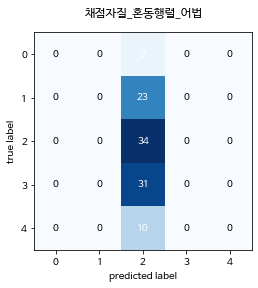

In [ ]:
result = []

model.eval()

with torch.no_grad():
  for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(test_grammar_dataloader), total=len(test_grammar_dataloader)):
      token_ids = token_ids.long().to(device)
      segment_ids = segment_ids.long().to(device)
      valid_length= valid_length
      result.append(model(token_ids, valid_length, segment_ids))



result_grammar = []
for i in result:
  for j in i:
    result_grammar.append(int(torch.argmax(j)))

cm_test_target = list(test_target)

import sklearn
from sklearn.metrics import confusion_matrix as cfm

cm = cfm(cm_test_target, result_grammar)

from sklearn.metrics import classification_report as cr

print(cr(cm_test_target, result_grammar))


from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')
flgure, ax = plot_confusion_matrix(conf_mat =cm,
                             cmap = plt.cm.Blues)
ax.set_title('채점자질_혼동행렬_어법')
plt.savefig('채점자질_혼동행렬_어법.jpg')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.2837642431259155 train acc 1.0
epoch 1 batch id 201 loss 1.0323917865753174 train acc 0.34328358208955223
epoch 1 train acc 0.3225


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 1 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.9869269132614136 train acc 1.0
epoch 2 batch id 201 loss 1.1182411909103394 train acc 0.31840796019900497
epoch 2 train acc 0.3175


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 2 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.8335772752761841 train acc 1.0
epoch 3 batch id 201 loss 1.040400743484497 train acc 0.31840796019900497
epoch 3 train acc 0.3275


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 3 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.920814037322998 train acc 1.0
epoch 4 batch id 201 loss 0.9880132675170898 train acc 0.3283582089552239
epoch 4 train acc 0.3375


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 4 test acc 0.34


  0%|          | 0/400 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 1.087471842765808 train acc 0.0
epoch 5 batch id 201 loss 1.0352107286453247 train acc 0.34328358208955223
epoch 5 train acc 0.3425


  0%|          | 0/100 [00:00<?, ?it/s]

epoch 5 test acc 0.34


  0%|          | 0/100 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        17
           2       0.34      1.00      0.51        34
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        16

    accuracy                           0.34       100
   macro avg       0.07      0.20      0.10       100
weighted avg       0.12      0.34      0.17       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


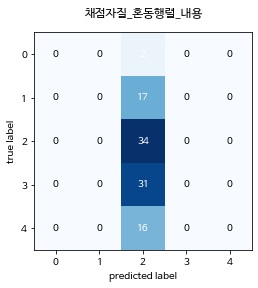

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/이용상교수님분석/latest_data_0810.csv', encoding='utf-8')

import sklearn
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data['essay'], data['content'],
                                                                      stratify = data['content'],
                                                                     test_size = 0.2,
                                                                       random_state = 1234)

train_data_content = pd.concat([train_input, train_target], axis = 1)

test_data_content = pd.concat([test_input, test_target], axis = 1)


class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, vocab=vocab, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))




# Setting parameters
max_len = 512
batch_size = 1
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5



train_data_content_list = []

for q, label in zip(train_data_content['essay'], train_data_content['content']):
  data = []
  data.append(q)
  data.append(str(label))

  train_data_content_list.append(data)


test_data_content_list = []

for q, label in zip(test_data_content['essay'], test_data_content['content']):
  data_test = []
  data_test.append(q)
  data_test.append(str(label))

  test_data_content_list.append(data_test)



tok = tokenizer.tokenize

data_train = BERTDataset(train_data_content_list, 0, 1, tok, vocab, max_len, True, False)
data_test = BERTDataset(test_data_content_list, 0, 1, tok, vocab, max_len, True, False)



train_content_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_content_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)



class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)


model = BERTClassifier(bertmodel,  dr_rate=0.1).to(device)



# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]



optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_content_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)


def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc


for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(train_content_dataloader), total=len(train_content_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(test_content_dataloader), total=len(test_content_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))


result = []

model.eval()

with torch.no_grad():
  for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(test_content_dataloader), total=len(test_content_dataloader)):
      token_ids = token_ids.long().to(device)
      segment_ids = segment_ids.long().to(device)
      valid_length= valid_length
      result.append(model(token_ids, valid_length, segment_ids))



result_content = []
for i in result:
  for j in i:
    result_content.append(int(torch.argmax(j)))

cm_test_target = list(test_target)

import sklearn
from sklearn.metrics import confusion_matrix as cfm

cm = cfm(cm_test_target, result_content)

from sklearn.metrics import classification_report as cr

print(cr(cm_test_target, result_content))


from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')
flgure, ax = plot_confusion_matrix(conf_mat =cm,
                             cmap = plt.cm.Blues)
ax.set_title('채점자질_혼동행렬_내용')
plt.savefig('채점자질_혼동행렬_내용.jpg')